In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Read csv file

df_hn = pd.read_csv('AQI_HaNoi_Updated.csv')
df_dn = pd.read_csv('AQI_DaNang_Updated.csv')
df_vt = pd.read_csv('AQI_VietTri_Updated.csv')

df_hn = df_hn.reset_index()['AQI']
df_dn = df_dn.reset_index()['AQI']
df_vt = df_vt.reset_index()['AQI']

df_hn

0        72.000000
1        68.000000
2        94.000000
3       105.000000
4        80.000000
           ...    
1974    153.571429
1975    113.333333
1976     94.000000
1977     96.000000
1978    162.857143
Name: AQI, Length: 1979, dtype: float64

In [3]:
# Scaler data

scaler = MinMaxScaler(feature_range=(0,1))

df_hn = scaler.fit_transform(np.array(df_hn).reshape(-1,1))
df_dn = scaler.fit_transform(np.array(df_dn).reshape(-1,1))
df_vt = scaler.fit_transform(np.array(df_vt).reshape(-1,1))

In [4]:
# Convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Ha Noi

In [5]:
# Ha Noi
# train:test 7:3
train_size_7_3 = int(0.7 * len(df_hn))
test_size_7_3 = len(df_hn) - train_size_7_3

train_data_7_3 = df_hn[:train_size_7_3]
test_data_7_3 = df_hn[train_size_7_3:]

# train:test 8:2
train_size_8_2 = int(0.8 * len(df_hn))
test_size_8_2 = len(df_hn) - train_size_8_2

train_data_8_2 = df_hn[:train_size_8_2]
test_data_8_2 = df_hn[train_size_8_2:]

# train:test 9:1
train_size_9_1 = int(0.9 * len(df_hn))
test_size_9_1 = len(df_hn) - train_size_9_1

train_data_9_1 = df_hn[:train_size_9_1]
test_data_9_1 = df_hn[train_size_9_1:]

In [6]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100

X_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
X_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

X_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
X_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

X_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
X_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [7]:
# Reshape input to be [samples, time steps, features] which is required for LSTM

X_train_7_3 = X_train_7_3.reshape(X_train_7_3.shape[0],X_train_7_3.shape[1] , 1)
X_test_7_3 = X_test_7_3.reshape(X_test_7_3.shape[0],X_test_7_3.shape[1] , 1)

X_train_8_2 = X_train_8_2.reshape(X_train_8_2.shape[0],X_train_8_2.shape[1] , 1)
X_test_8_2 = X_test_8_2.reshape(X_test_8_2.shape[0],X_test_8_2.shape[1] , 1)

X_train_9_1 = X_train_9_1.reshape(X_train_9_1.shape[0],X_train_9_1.shape[1] , 1)
X_test_9_1 = X_test_9_1.reshape(X_test_9_1.shape[0],X_test_9_1.shape[1] , 1)

## Ha Noi - train:test 7:3

In [8]:
# Define LSTM Model

model_7_3 =Sequential()
model_7_3.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_7_3.add(LSTM(50,return_sequences=True))
model_7_3.add(LSTM(50))
model_7_3.add(Dense(1))
model_7_3.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Fit the model to the train data

model_7_3.fit(X_train_7_3, y_train_7_3, validation_data=(X_test_7_3, y_test_7_3), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0563 - val_loss: 0.0206
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0254 - val_loss: 0.0220
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0253 - val_loss: 0.0207
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0230 - val_loss: 0.0214
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0217 - val_loss: 0.0208
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0227 - val_loss: 0.0210
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0228 - val_loss: 0.0245
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0220 - val_loss: 0.0204
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0234 - val_loss: 0.0208
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0213 - val_loss: 0.0211
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0226 - val_loss: 0.0199
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step

In [10]:
# Predict test data

y_pred_7_3 = model_7_3.predict(X_test_7_3)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [11]:
# Inverse transform

y_pred_7_3 = scaler.inverse_transform(y_pred_7_3)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_test_7_3_scale = scaler.inverse_transform(y_test_7_3.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_7_3_scale, y_pred_7_3))
mae = mean_absolute_error(y_test_7_3_scale, y_pred_7_3)
mape = np.mean(np.abs((y_test_7_3_scale - y_pred_7_3) / y_test_7_3_scale)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 26.61
MAE: 20.60
MAPE: 20.20%


In [13]:
# Dự báo 30 ngày tiếp theo

x_input_7_3_30d=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3_30d.shape

temp_input_7_3_30d=list(x_input_7_3_30d)
temp_input_7_3_30d=temp_input_7_3_30d[0].tolist()

lst_output_7_3_30d=[]
n_steps=100
i=0

while(i < 30):

    if(len(temp_input_7_3_30d) > 100):
        x_input_7_3_30d = np.array(temp_input_7_3_30d[1:])
        x_input_7_3_30d = x_input_7_3_30d.reshape(1,-1)
        x_input_7_3_30d = x_input_7_3_30d.reshape((1, n_steps, 1))
        yhat = model_7_3.predict(x_input_7_3_30d, verbose=0)
        temp_input_7_3_30d.extend(yhat[0].tolist())
        temp_input_7_3_30d = temp_input_7_3_30d[1:]
        lst_output_7_3_30d.extend(yhat.tolist())

    else:
        x_input_7_3_30d = x_input_7_3_30d.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3_30d, verbose=0)
        temp_input_7_3_30d.extend(yhat[0].tolist())
        lst_output_7_3_30d.extend(yhat.tolist())

    i=i+1

In [14]:
# Dự báo 60 ngày tiếp theo

x_input_7_3_60d=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3_60d.shape

temp_input_7_3_60d=list(x_input_7_3_60d)
temp_input_7_3_60d=temp_input_7_3_60d[0].tolist()

lst_output_7_3_60d=[]
n_steps=100
i=0

while(i < 60):

    if(len(temp_input_7_3_60d) > 100):
        x_input_7_3_60d = np.array(temp_input_7_3_60d[1:])
        x_input_7_3_60d = x_input_7_3_60d.reshape(1,-1)
        x_input_7_3_60d = x_input_7_3_60d.reshape((1, n_steps, 1))
        yhat = model_7_3.predict(x_input_7_3_60d, verbose=0)
        temp_input_7_3_60d.extend(yhat[0].tolist())
        temp_input_7_3_60d = temp_input_7_3_60d[1:]
        lst_output_7_3_60d.extend(yhat.tolist())

    else:
        x_input_7_3_60d = x_input_7_3_60d.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3_60d, verbose=0)
        temp_input_7_3_60d.extend(yhat[0].tolist())
        lst_output_7_3_60d.extend(yhat.tolist())

    i=i+1

In [15]:
# Dự báo 90 ngày tiếp theo

x_input_7_3_90d=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3_90d.shape

temp_input_7_3_90d=list(x_input_7_3_90d)
temp_input_7_3_90d=temp_input_7_3_90d[0].tolist()

lst_output_7_3_90d=[]
n_steps=100
i=0

while(i < 90):

    if(len(temp_input_7_3_90d) > 100):
        x_input_7_3_90d = np.array(temp_input_7_3_90d[1:])
        x_input_7_3_90d = x_input_7_3_90d.reshape(1,-1)
        x_input_7_3_90d = x_input_7_3_90d.reshape((1, n_steps, 1))
        yhat = model_7_3.predict(x_input_7_3_90d, verbose=0)
        temp_input_7_3_90d.extend(yhat[0].tolist())
        temp_input_7_3_90d = temp_input_7_3_90d[1:]
        lst_output_7_3_90d.extend(yhat.tolist())

    else:
        x_input_7_3_90d = x_input_7_3_90d.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3_90d, verbose=0)
        temp_input_7_3_90d.extend(yhat[0].tolist())
        lst_output_7_3_90d.extend(yhat.tolist())

    i=i+1

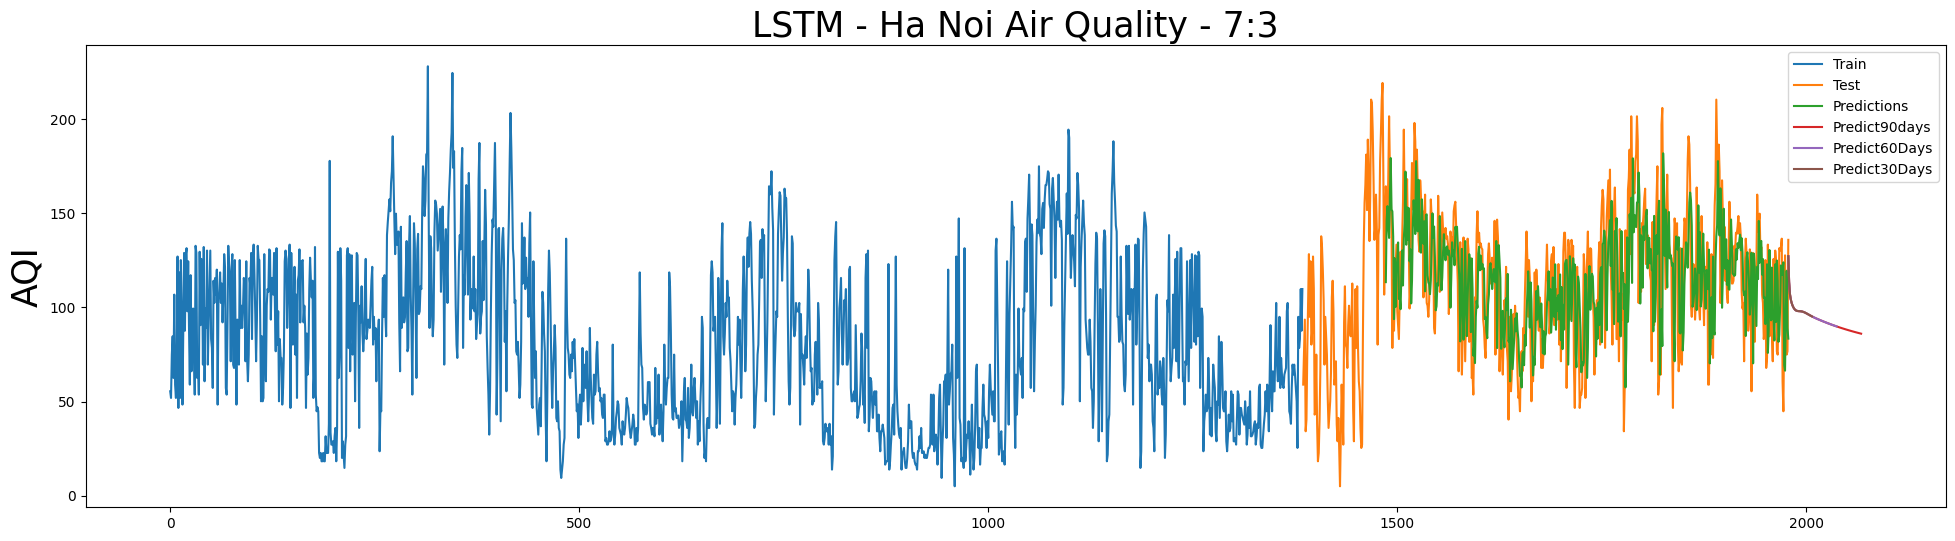

In [16]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3+101, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,(y_pred_7_3))

prediect_data_index_90d = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+89, step=1)
plt.plot(prediect_data_index_90d,scaler.inverse_transform(lst_output_7_3_90d))

prediect_data_index_60d = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+59, step=1)
plt.plot(prediect_data_index_60d,scaler.inverse_transform(lst_output_7_3_60d))

prediect_data_index_30d = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+29, step=1)
plt.plot(prediect_data_index_30d,scaler.inverse_transform(lst_output_7_3_30d))

plt.title('LSTM - Ha Noi Air Quality - 7:3', fontsize = 25)
plt.ylabel('AQI', fontsize = 25)
plt.legend(['Train','Test','Predictions', 'Predict90days', 'Predict60Days', 'Predict30Days'])
plt.show()

## Ha Noi - train:test 8:2

In [17]:
model_8_2 =Sequential()
model_8_2.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_8_2.add(LSTM(50,return_sequences=True))
model_8_2.add(LSTM(50))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model_8_2.fit(X_train_8_2, y_train_8_2, validation_data=(X_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0801 - val_loss: 0.0234
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0246 - val_loss: 0.0240
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0244 - val_loss: 0.0238
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0231 - val_loss: 0.0245
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0238 - val_loss: 0.0235
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0238 - val_loss: 0.0268
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0246 - val_loss: 0.0240
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0223 - val_loss: 0.0244
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0224 - val_loss: 0.0234
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0237 - val_loss: 0.0226
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0227 - val_loss: 0.0221
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step

In [19]:
y_pred_8_2 = model_8_2.predict(X_test_8_2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [20]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2)

In [21]:
y_test_8_2_scale = scaler.inverse_transform(y_test_8_2.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_8_2_scale, y_pred_8_2))
mae = mean_absolute_error(y_test_8_2_scale, y_pred_8_2)
mape = np.mean(np.abs((y_test_8_2_scale - y_pred_8_2) / y_test_8_2_scale)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 29.34
MAE: 22.87
MAPE: 23.07%


In [22]:
# Dự báo 30 ngày tiếp theo

x_input_8_2_30d=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2_30d.shape

temp_input_8_2_30d=list(x_input_8_2_30d)
temp_input_8_2_30d=temp_input_8_2_30d[0].tolist()

lst_output_8_2_30d=[]
n_steps=100
i=0

while(i < 30):

    if(len(temp_input_8_2_30d) > 100):
        x_input_8_2_30d = np.array(temp_input_8_2_30d[1:])
        x_input_8_2_30d = x_input_8_2_30d.reshape(1,-1)
        x_input_8_2_30d = x_input_8_2_30d.reshape((1, n_steps, 1))
        yhat = model_8_2.predict(x_input_8_2_30d, verbose=0)
        temp_input_8_2_30d.extend(yhat[0].tolist())
        temp_input_8_2_30d = temp_input_8_2_30d[1:]
        lst_output_8_2_30d.extend(yhat.tolist())

    else:
        x_input_8_2_30d = x_input_8_2_30d.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2_30d, verbose=0)
        temp_input_8_2_30d.extend(yhat[0].tolist())
        lst_output_8_2_30d.extend(yhat.tolist())

    i=i+1

In [23]:
# Dự báo 60 ngày tiếp theo

x_input_8_2_60d=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2_60d.shape

temp_input_8_2_60d=list(x_input_8_2_60d)
temp_input_8_2_60d=temp_input_8_2_60d[0].tolist()

lst_output_8_2_60d=[]
n_steps=100
i=0

while(i < 60):

    if(len(temp_input_8_2_60d) > 100):
        x_input_8_2_60d = np.array(temp_input_8_2_60d[1:])
        x_input_8_2_60d = x_input_8_2_60d.reshape(1,-1)
        x_input_8_2_60d = x_input_8_2_60d.reshape((1, n_steps, 1))
        yhat = model_8_2.predict(x_input_8_2_60d, verbose=0)
        temp_input_8_2_60d.extend(yhat[0].tolist())
        temp_input_8_2_60d = temp_input_8_2_60d[1:]
        lst_output_8_2_60d.extend(yhat.tolist())

    else:
        x_input_8_2_60d = x_input_8_2_60d.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2_60d, verbose=0)
        temp_input_8_2_60d.extend(yhat[0].tolist())
        lst_output_8_2_60d.extend(yhat.tolist())

    i=i+1

In [24]:
# Dự báo 90 ngày tiếp theo

x_input_8_2_90d=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2_90d.shape

temp_input_8_2_90d=list(x_input_8_2_90d)
temp_input_8_2_90d=temp_input_8_2_90d[0].tolist()

lst_output_8_2_90d=[]
n_steps=100
i=0

while(i < 90):

    if(len(temp_input_8_2_90d) > 100):
        x_input_8_2_90d = np.array(temp_input_8_2_90d[1:])
        x_input_8_2_90d = x_input_8_2_90d.reshape(1,-1)
        x_input_8_2_90d = x_input_8_2_90d.reshape((1, n_steps, 1))
        yhat = model_8_2.predict(x_input_8_2_90d, verbose=0)
        temp_input_8_2_90d.extend(yhat[0].tolist())
        temp_input_8_2_90d = temp_input_8_2_90d[1:]
        lst_output_8_2_90d.extend(yhat.tolist())

    else:
        x_input_8_2_90d = x_input_8_2_90d.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2_90d, verbose=0)
        temp_input_8_2_90d.extend(yhat[0].tolist())
        lst_output_8_2_90d.extend(yhat.tolist())

    i=i+1

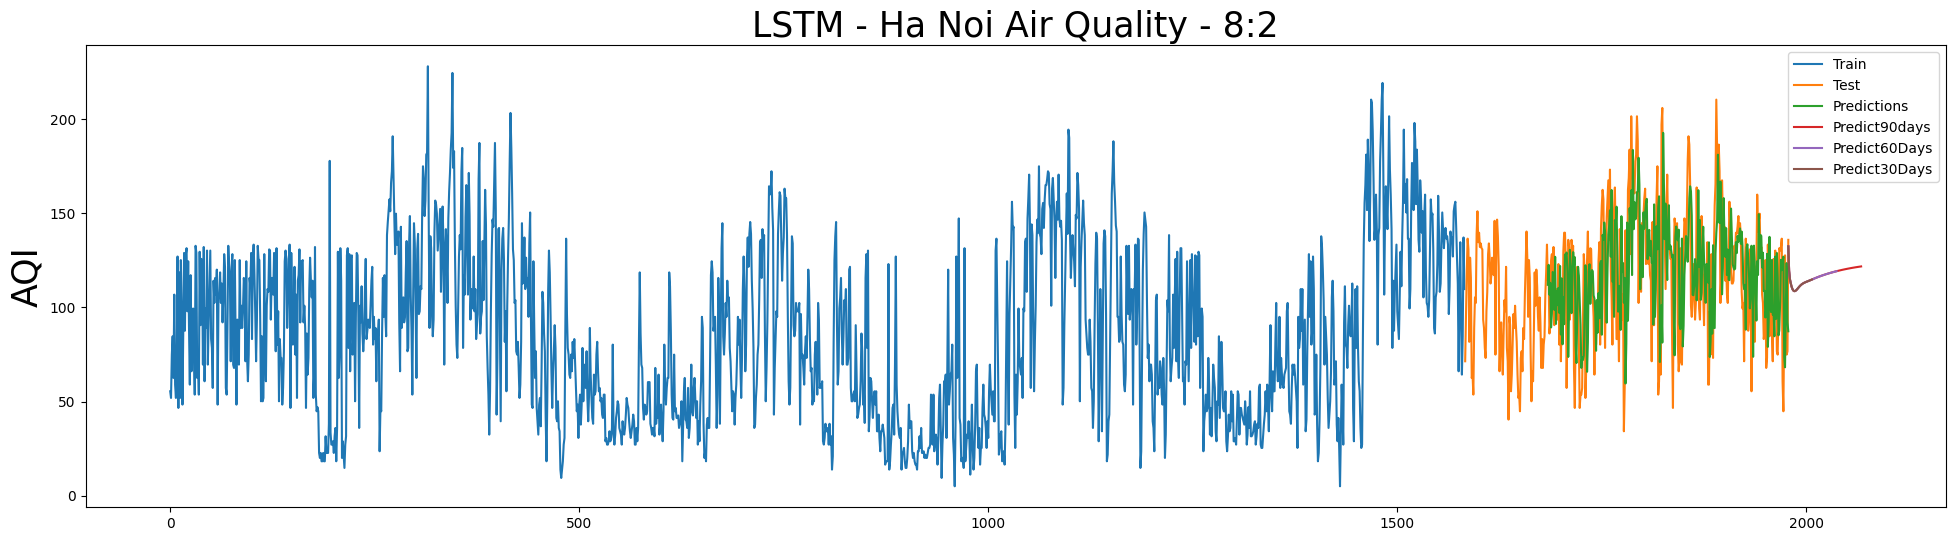

In [25]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2+101, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,(y_pred_8_2))

prediect_data_index_90d = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+89, step=1)
plt.plot(prediect_data_index_90d,scaler.inverse_transform(lst_output_8_2_90d))

prediect_data_index_60d = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+59, step=1)
plt.plot(prediect_data_index_60d,scaler.inverse_transform(lst_output_8_2_60d))

prediect_data_index_30d = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+29, step=1)
plt.plot(prediect_data_index_30d,scaler.inverse_transform(lst_output_8_2_30d))

plt.title('LSTM - Ha Noi Air Quality - 8:2', fontsize = 25)
plt.ylabel('AQI', fontsize = 25)
plt.legend(['Train','Test','Predictions', 'Predict90days', 'Predict60Days', 'Predict30Days'])
plt.show()

## Ha Noi - train:test 9:1

In [26]:
model_9_1 =Sequential()
model_9_1.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_9_1.add(LSTM(50,return_sequences=True))
model_9_1.add(LSTM(50))
model_9_1.add(Dense(1))
model_9_1.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model_9_1.fit(X_train_9_1, y_train_9_1, validation_data=(X_test_9_1, y_test_9_1), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0620 - val_loss: 0.0192
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0244 - val_loss: 0.0217
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0227 - val_loss: 0.0197
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0234 - val_loss: 0.0203
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0238 - val_loss: 0.0257
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0226 - val_loss: 0.0194
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0232 - val_loss: 0.0193
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0226 - val_loss: 0.0192
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0221 - val_loss: 0.0192
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0213 - val_loss: 0.0188
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0227 - val_loss: 0.0185
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step

In [28]:
y_pred_9_1 = model_9_1.predict(X_test_9_1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


In [29]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1)

In [30]:
y_test_9_1_scale = scaler.inverse_transform(y_test_9_1.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_9_1_scale, y_pred_9_1))
mae = mean_absolute_error(y_test_9_1_scale, y_pred_9_1)
mape = np.mean(np.abs((y_test_9_1_scale - y_pred_9_1) / y_test_9_1_scale)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 26.70
MAE: 21.03
MAPE: 19.44%


In [31]:
# Dự báo 30 ngày tiếp theo

x_input_9_1_30d=test_data_9_1[-100:].reshape(1,-1)
x_input_9_1_30d.shape

temp_input_9_1_30d=list(x_input_9_1_30d)
temp_input_9_1_30d=temp_input_9_1_30d[0].tolist()

lst_output_9_1_30d=[]
n_steps=100
i=0

while(i < 30):

    if(len(temp_input_9_1_30d) > 100):
        x_input_9_1_30d = np.array(temp_input_9_1_30d[1:])
        x_input_9_1_30d = x_input_9_1_30d.reshape(1,-1)
        x_input_9_1_30d = x_input_9_1_30d.reshape((1, n_steps, 1))
        yhat = model_9_1.predict(x_input_9_1_30d, verbose=0)
        temp_input_9_1_30d.extend(yhat[0].tolist())
        temp_input_9_1_30d = temp_input_9_1_30d[1:]
        lst_output_9_1_30d.extend(yhat.tolist())

    else:
        x_input_9_1_30d = x_input_9_1_30d.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1_30d, verbose=0)
        temp_input_9_1_30d.extend(yhat[0].tolist())
        lst_output_9_1_30d.extend(yhat.tolist())

    i=i+1

In [32]:
# Dự báo 60 ngày tiếp theo

x_input_9_1_60d=test_data_8_2[-100:].reshape(1,-1)
x_input_9_1_60d.shape

temp_input_9_1_60d=list(x_input_9_1_60d)
temp_input_9_1_60d=temp_input_9_1_60d[0].tolist()

lst_output_9_1_60d=[]
n_steps=100
i=0

while(i < 60):

    if(len(temp_input_9_1_60d) > 100):
        x_input_9_1_60d = np.array(temp_input_9_1_60d[1:])
        x_input_9_1_60d = x_input_9_1_60d.reshape(1,-1)
        x_input_9_1_60d = x_input_9_1_60d.reshape((1, n_steps, 1))
        yhat = model_9_1.predict(x_input_9_1_60d, verbose=0)
        temp_input_9_1_60d.extend(yhat[0].tolist())
        temp_input_9_1_60d = temp_input_9_1_60d[1:]
        lst_output_9_1_60d.extend(yhat.tolist())

    else:
        x_input_9_1_60d = x_input_9_1_60d.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1_60d, verbose=0)
        temp_input_9_1_60d.extend(yhat[0].tolist())
        lst_output_9_1_60d.extend(yhat.tolist())

    i=i+1

In [33]:
# Dự báo 90 ngày tiếp theo

x_input_9_1_90d=test_data_8_2[-100:].reshape(1,-1)
x_input_9_1_90d.shape

temp_input_9_1_90d=list(x_input_9_1_90d)
temp_input_9_1_90d=temp_input_9_1_90d[0].tolist()

lst_output_9_1_90d=[]
n_steps=100
i=0

while(i < 90):

    if(len(temp_input_9_1_90d) > 100):
        x_input_9_1_90d = np.array(temp_input_9_1_90d[1:])
        x_input_9_1_90d = x_input_9_1_90d.reshape(1,-1)
        x_input_9_1_90d = x_input_9_1_90d.reshape((1, n_steps, 1))
        yhat = model_9_1.predict(x_input_9_1_90d, verbose=0)
        temp_input_9_1_90d.extend(yhat[0].tolist())
        temp_input_9_1_90d = temp_input_9_1_90d[1:]
        lst_output_9_1_90d.extend(yhat.tolist())

    else:
        x_input_9_1_90d = x_input_9_1_90d.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1_90d, verbose=0)
        temp_input_9_1_90d.extend(yhat[0].tolist())
        lst_output_9_1_90d.extend(yhat.tolist())

    i=i+1

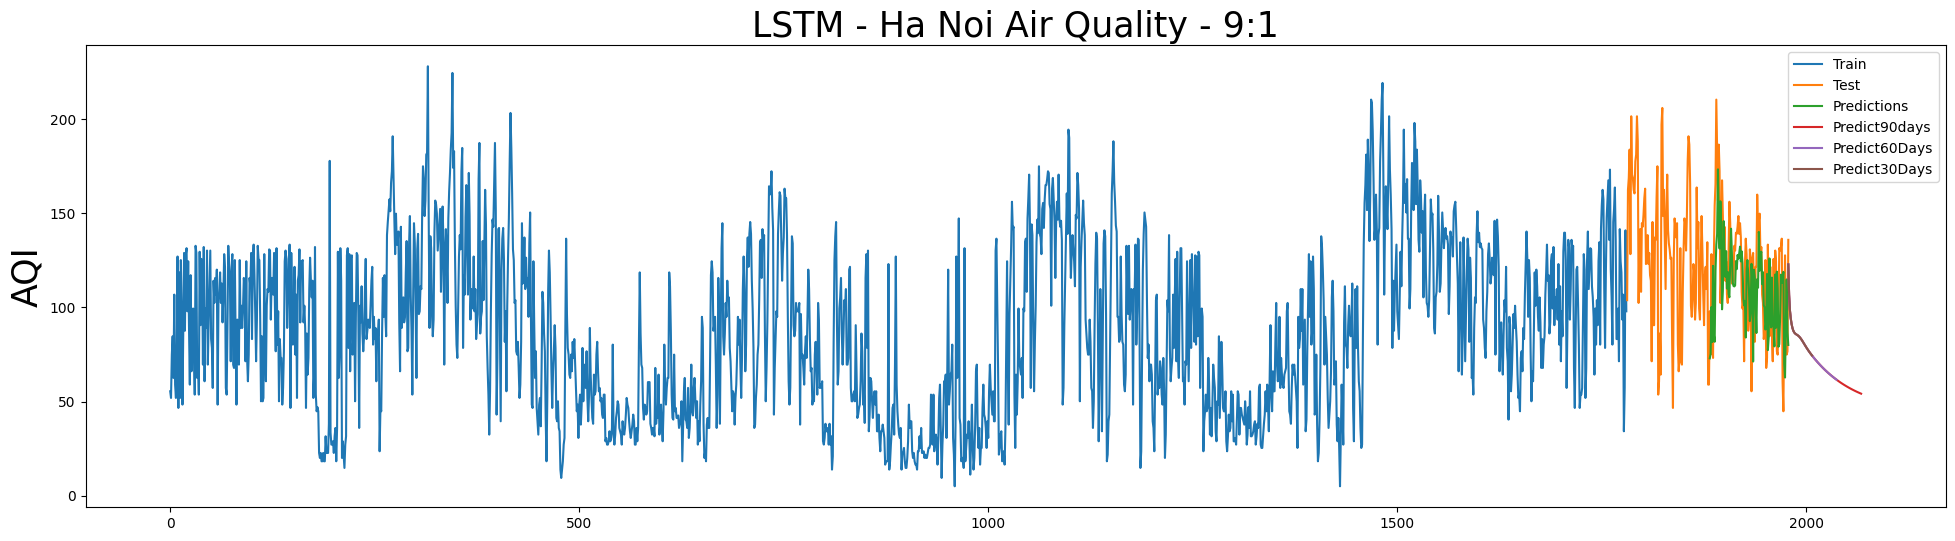

In [34]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1+101, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,(y_pred_9_1))

prediect_data_index_90d = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+89, step=1)
plt.plot(prediect_data_index_90d,scaler.inverse_transform(lst_output_9_1_90d))

prediect_data_index_60d = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+59, step=1)
plt.plot(prediect_data_index_60d,scaler.inverse_transform(lst_output_9_1_60d))

prediect_data_index_30d = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+29, step=1)
plt.plot(prediect_data_index_30d,scaler.inverse_transform(lst_output_9_1_30d))

plt.title('LSTM - Ha Noi Air Quality - 9:1', fontsize = 25)
plt.ylabel('AQI', fontsize = 25)
plt.legend(['Train','Test','Predictions', 'Predict90days', 'Predict60Days', 'Predict30Days'])
plt.show()

# Da Nang

In [35]:
# Da Nang
# train:test 7:3
train_size_7_3 = int(0.7 * len(df_dn))
test_size_7_3 = len(df_dn) - train_size_7_3

train_data_7_3 = df_dn[:train_size_7_3]
test_data_7_3 = df_dn[train_size_7_3:]

# train:test 8:2
train_size_8_2 = int(0.8 * len(df_dn))
test_size_8_2 = len(df_dn) - train_size_8_2

train_data_8_2 = df_dn[:train_size_8_2]
test_data_8_2 = df_dn[train_size_8_2:]

# train:test 9:1
train_size_9_1 = int(0.9 * len(df_dn))
test_size_9_1 = len(df_dn) - train_size_9_1

train_data_9_1 = df_dn[:train_size_9_1]
test_data_9_1 = df_dn[train_size_9_1:]

In [36]:
time_step = 100

X_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
X_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

X_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
X_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

X_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
X_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [37]:
X_train_7_3 = X_train_7_3.reshape(X_train_7_3.shape[0],X_train_7_3.shape[1] , 1)
X_test_7_3 = X_test_7_3.reshape(X_test_7_3.shape[0],X_test_7_3.shape[1] , 1)

X_train_8_2 = X_train_8_2.reshape(X_train_8_2.shape[0],X_train_8_2.shape[1] , 1)
X_test_8_2 = X_test_8_2.reshape(X_test_8_2.shape[0],X_test_8_2.shape[1] , 1)

X_train_9_1 = X_train_9_1.reshape(X_train_9_1.shape[0],X_train_9_1.shape[1] , 1)
X_test_9_1 = X_test_9_1.reshape(X_test_9_1.shape[0],X_test_9_1.shape[1] , 1)

## Da Nang - train:test 7:3

In [38]:
model_7_3 =Sequential()
model_7_3.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_7_3.add(LSTM(50,return_sequences=True))
model_7_3.add(LSTM(50))
model_7_3.add(Dense(1))
model_7_3.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model_7_3.fit(X_train_7_3, y_train_7_3, validation_data=(X_test_7_3, y_test_7_3), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0263 - val_loss: 0.0203
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0104 - val_loss: 0.0198
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0084 - val_loss: 0.0194
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0089 - val_loss: 0.0187
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0091 - val_loss: 0.0204
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0100 - val_loss: 0.0186
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0085 - val_loss: 0.0177
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0079 - val_loss: 0.0173
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0087 - val_loss: 0.0172
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0093 - val_loss: 0.0175
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0081 - val_loss: 0.0172
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step

In [40]:
y_pred_7_3 = model_7_3.predict(X_test_7_3)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [41]:
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_test_7_3_scale = scaler.inverse_transform(y_test_7_3.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_7_3_scale, y_pred_7_3))
mae = mean_absolute_error(y_test_7_3_scale, y_pred_7_3)
mape = np.mean(np.abs((y_test_7_3_scale - y_pred_7_3) / y_test_7_3_scale)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 23.57
MAE: 17.09
MAPE: 55.26%


In [43]:
# Dự báo 30 ngày tiếp theo

x_input_7_3_30d=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3_30d.shape

temp_input_7_3_30d=list(x_input_7_3_30d)
temp_input_7_3_30d=temp_input_7_3_30d[0].tolist()

lst_output_7_3_30d=[]
n_steps=100
i=0

while(i < 30):

    if(len(temp_input_7_3_30d) > 100):
        x_input_7_3_30d = np.array(temp_input_7_3_30d[1:])
        x_input_7_3_30d = x_input_7_3_30d.reshape(1,-1)
        x_input_7_3_30d = x_input_7_3_30d.reshape((1, n_steps, 1))
        yhat = model_7_3.predict(x_input_7_3_30d, verbose=0)
        temp_input_7_3_30d.extend(yhat[0].tolist())
        temp_input_7_3_30d = temp_input_7_3_30d[1:]
        lst_output_7_3_30d.extend(yhat.tolist())

    else:
        x_input_7_3_30d = x_input_7_3_30d.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3_30d, verbose=0)
        temp_input_7_3_30d.extend(yhat[0].tolist())
        lst_output_7_3_30d.extend(yhat.tolist())

    i=i+1

In [44]:
# Dự báo 60 ngày tiếp theo

x_input_7_3_60d=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3_60d.shape

temp_input_7_3_60d=list(x_input_7_3_60d)
temp_input_7_3_60d=temp_input_7_3_60d[0].tolist()

lst_output_7_3_60d=[]
n_steps=100
i=0

while(i < 60):

    if(len(temp_input_7_3_60d) > 100):
        x_input_7_3_60d = np.array(temp_input_7_3_60d[1:])
        x_input_7_3_60d = x_input_7_3_60d.reshape(1,-1)
        x_input_7_3_60d = x_input_7_3_60d.reshape((1, n_steps, 1))
        yhat = model_7_3.predict(x_input_7_3_60d, verbose=0)
        temp_input_7_3_60d.extend(yhat[0].tolist())
        temp_input_7_3_60d = temp_input_7_3_60d[1:]
        lst_output_7_3_60d.extend(yhat.tolist())

    else:
        x_input_7_3_60d = x_input_7_3_60d.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3_60d, verbose=0)
        temp_input_7_3_60d.extend(yhat[0].tolist())
        lst_output_7_3_60d.extend(yhat.tolist())

    i=i+1

In [45]:
# Dự báo 90 ngày tiếp theo

x_input_7_3_90d=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3_90d.shape

temp_input_7_3_90d=list(x_input_7_3_90d)
temp_input_7_3_90d=temp_input_7_3_90d[0].tolist()

lst_output_7_3_90d=[]
n_steps=100
i=0

while(i < 90):

    if(len(temp_input_7_3_90d) > 100):
        x_input_7_3_90d = np.array(temp_input_7_3_90d[1:])
        x_input_7_3_90d = x_input_7_3_90d.reshape(1,-1)
        x_input_7_3_90d = x_input_7_3_90d.reshape((1, n_steps, 1))
        yhat = model_7_3.predict(x_input_7_3_90d, verbose=0)
        temp_input_7_3_90d.extend(yhat[0].tolist())
        temp_input_7_3_90d = temp_input_7_3_90d[1:]
        lst_output_7_3_90d.extend(yhat.tolist())

    else:
        x_input_7_3_90d = x_input_7_3_90d.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3_90d, verbose=0)
        temp_input_7_3_90d.extend(yhat[0].tolist())
        lst_output_7_3_90d.extend(yhat.tolist())

    i=i+1

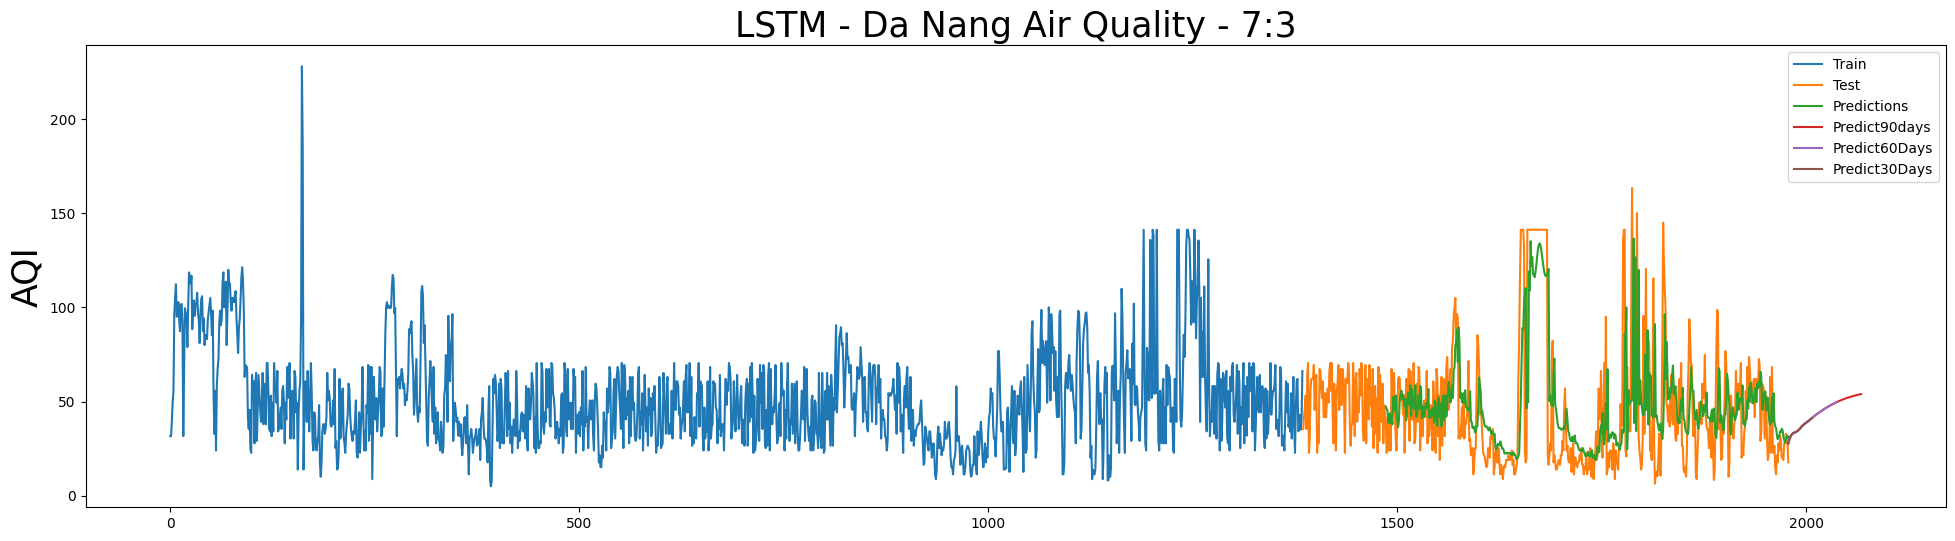

In [46]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3+101, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,(y_pred_7_3))

prediect_data_index_90d = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+89, step=1)
plt.plot(prediect_data_index_90d,scaler.inverse_transform(lst_output_7_3_90d))

prediect_data_index_60d = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+59, step=1)
plt.plot(prediect_data_index_60d,scaler.inverse_transform(lst_output_7_3_60d))

prediect_data_index_30d = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+29, step=1)
plt.plot(prediect_data_index_30d,scaler.inverse_transform(lst_output_7_3_30d))

plt.title('LSTM - Da Nang Air Quality - 7:3', fontsize = 25)
plt.ylabel('AQI', fontsize = 25)
plt.legend(['Train','Test','Predictions', 'Predict90days', 'Predict60Days', 'Predict30Days'])
plt.show()

## Da Nang - train:test 8:2

In [47]:
model_8_2 =Sequential()
model_8_2.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_8_2.add(LSTM(50,return_sequences=True))
model_8_2.add(LSTM(50))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model_8_2.fit(X_train_8_2, y_train_8_2, validation_data=(X_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0078 - val_loss: 0.0152
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0078 - val_loss: 0.0142
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0090 - val_loss: 0.0147
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0069 - val_loss: 0.0139
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0072 - val_loss: 0.0143
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0070 - val_loss: 0.0124
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0073 - val_loss: 0.0127
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0067 - val_loss: 0.0123
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0072 - val_loss: 0.0125
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0065 - val_loss: 0.0119
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0066 - val_loss: 0.0117
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step

In [50]:
y_pred_8_2 = model_8_2.predict(X_test_8_2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [51]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2)

In [52]:
y_test_8_2_scale = scaler.inverse_transform(y_test_8_2.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_8_2_scale, y_pred_8_2))
mae = mean_absolute_error(y_test_8_2_scale, y_pred_8_2)
mape = np.mean(np.abs((y_test_8_2_scale - y_pred_8_2) / y_test_8_2_scale)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 26.83
MAE: 19.18
MAPE: 67.74%


In [53]:
# Dự báo 30 ngày tiếp theo

x_input_8_2_30d=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2_30d.shape

temp_input_8_2_30d=list(x_input_8_2_30d)
temp_input_8_2_30d=temp_input_8_2_30d[0].tolist()

lst_output_8_2_30d=[]
n_steps=100
i=0

while(i < 30):

    if(len(temp_input_8_2_30d) > 100):
        x_input_8_2_30d = np.array(temp_input_8_2_30d[1:])
        x_input_8_2_30d = x_input_8_2_30d.reshape(1,-1)
        x_input_8_2_30d = x_input_8_2_30d.reshape((1, n_steps, 1))
        yhat = model_8_2.predict(x_input_8_2_30d, verbose=0)
        temp_input_8_2_30d.extend(yhat[0].tolist())
        temp_input_8_2_30d = temp_input_8_2_30d[1:]
        lst_output_8_2_30d.extend(yhat.tolist())

    else:
        x_input_8_2_30d = x_input_8_2_30d.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2_30d, verbose=0)
        temp_input_8_2_30d.extend(yhat[0].tolist())
        lst_output_8_2_30d.extend(yhat.tolist())

    i=i+1

In [54]:
# Dự báo 60 ngày tiếp theo

x_input_8_2_60d=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2_60d.shape

temp_input_8_2_60d=list(x_input_8_2_60d)
temp_input_8_2_60d=temp_input_8_2_60d[0].tolist()

lst_output_8_2_60d=[]
n_steps=100
i=0

while(i < 60):

    if(len(temp_input_8_2_60d) > 100):
        x_input_8_2_60d = np.array(temp_input_8_2_60d[1:])
        x_input_8_2_60d = x_input_8_2_60d.reshape(1,-1)
        x_input_8_2_60d = x_input_8_2_60d.reshape((1, n_steps, 1))
        yhat = model_8_2.predict(x_input_8_2_60d, verbose=0)
        temp_input_8_2_60d.extend(yhat[0].tolist())
        temp_input_8_2_60d = temp_input_8_2_60d[1:]
        lst_output_8_2_60d.extend(yhat.tolist())

    else:
        x_input_8_2_60d = x_input_8_2_60d.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2_60d, verbose=0)
        temp_input_8_2_60d.extend(yhat[0].tolist())
        lst_output_8_2_60d.extend(yhat.tolist())

    i=i+1

In [55]:
# Dự báo 90 ngày tiếp theo

x_input_8_2_90d=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2_90d.shape

temp_input_8_2_90d=list(x_input_8_2_90d)
temp_input_8_2_90d=temp_input_8_2_90d[0].tolist()

lst_output_8_2_90d=[]
n_steps=100
i=0

while(i < 90):

    if(len(temp_input_8_2_90d) > 100):
        x_input_8_2_90d = np.array(temp_input_8_2_90d[1:])
        x_input_8_2_90d = x_input_8_2_90d.reshape(1,-1)
        x_input_8_2_90d = x_input_8_2_90d.reshape((1, n_steps, 1))
        yhat = model_8_2.predict(x_input_8_2_90d, verbose=0)
        temp_input_8_2_90d.extend(yhat[0].tolist())
        temp_input_8_2_90d = temp_input_8_2_90d[1:]
        lst_output_8_2_90d.extend(yhat.tolist())

    else:
        x_input_8_2_90d = x_input_8_2_90d.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2_90d, verbose=0)
        temp_input_8_2_90d.extend(yhat[0].tolist())
        lst_output_8_2_90d.extend(yhat.tolist())

    i=i+1

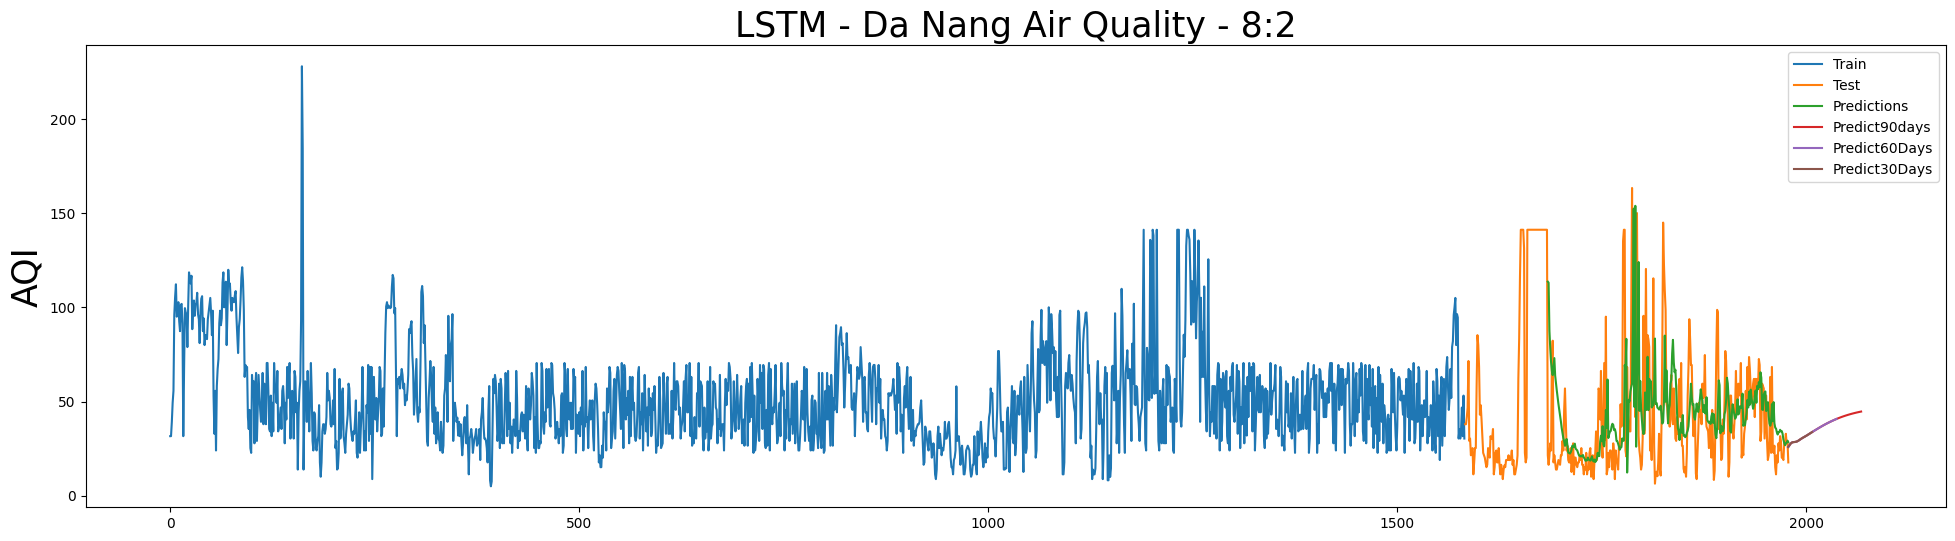

In [56]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2+101, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,(y_pred_8_2))

prediect_data_index_90d = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+89, step=1)
plt.plot(prediect_data_index_90d,scaler.inverse_transform(lst_output_8_2_90d))

prediect_data_index_60d = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+59, step=1)
plt.plot(prediect_data_index_60d,scaler.inverse_transform(lst_output_8_2_60d))

prediect_data_index_30d = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+29, step=1)
plt.plot(prediect_data_index_30d,scaler.inverse_transform(lst_output_8_2_30d))

plt.title('LSTM - Da Nang Air Quality - 8:2', fontsize = 25)
plt.ylabel('AQI', fontsize = 25)
plt.legend(['Train','Test','Predictions', 'Predict90days', 'Predict60Days', 'Predict30Days'])
plt.show()

## Da Nang - train:test 9:1

In [57]:
model_9_1 =Sequential()
model_9_1.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_9_1.add(LSTM(50,return_sequences=True))
model_9_1.add(LSTM(50))
model_9_1.add(Dense(1))
model_9_1.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model_9_1.fit(X_train_9_1, y_train_9_1, validation_data=(X_test_9_1, y_test_9_1), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0258 - val_loss: 0.0077
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0119 - val_loss: 0.0071
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0115 - val_loss: 0.0072
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0102 - val_loss: 0.0071
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0098 - val_loss: 0.0085
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0098 - val_loss: 0.0072
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0096 - val_loss: 0.0073
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0104 - val_loss: 0.0072
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0099 - val_loss: 0.0074
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step

In [59]:
y_pred_9_1 = model_9_1.predict(X_test_9_1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


In [60]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1)

In [61]:
y_test_9_1_scale = scaler.inverse_transform(y_test_9_1.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_9_1_scale, y_pred_9_1))
mae = mean_absolute_error(y_test_9_1_scale, y_pred_9_1)
mape = np.mean(np.abs((y_test_9_1_scale - y_pred_9_1) / y_test_9_1_scale)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 16.62
MAE: 12.99
MAPE: 46.38%


In [62]:
# Dự báo 30 ngày tiếp theo

x_input_9_1_30d=test_data_9_1[-100:].reshape(1,-1)
x_input_9_1_30d.shape

temp_input_9_1_30d=list(x_input_9_1_30d)
temp_input_9_1_30d=temp_input_9_1_30d[0].tolist()

lst_output_9_1_30d=[]
n_steps=100
i=0

while(i < 30):

    if(len(temp_input_9_1_30d) > 100):
        x_input_9_1_30d = np.array(temp_input_9_1_30d[1:])
        x_input_9_1_30d = x_input_9_1_30d.reshape(1,-1)
        x_input_9_1_30d = x_input_9_1_30d.reshape((1, n_steps, 1))
        yhat = model_9_1.predict(x_input_9_1_30d, verbose=0)
        temp_input_9_1_30d.extend(yhat[0].tolist())
        temp_input_9_1_30d = temp_input_9_1_30d[1:]
        lst_output_9_1_30d.extend(yhat.tolist())

    else:
        x_input_9_1_30d = x_input_9_1_30d.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1_30d, verbose=0)
        temp_input_9_1_30d.extend(yhat[0].tolist())
        lst_output_9_1_30d.extend(yhat.tolist())

    i=i+1

In [63]:
# Dự báo 60 ngày tiếp theo

x_input_9_1_60d=test_data_8_2[-100:].reshape(1,-1)
x_input_9_1_60d.shape

temp_input_9_1_60d=list(x_input_9_1_60d)
temp_input_9_1_60d=temp_input_9_1_60d[0].tolist()

lst_output_9_1_60d=[]
n_steps=100
i=0

while(i < 60):

    if(len(temp_input_9_1_60d) > 100):
        x_input_9_1_60d = np.array(temp_input_9_1_60d[1:])
        x_input_9_1_60d = x_input_9_1_60d.reshape(1,-1)
        x_input_9_1_60d = x_input_9_1_60d.reshape((1, n_steps, 1))
        yhat = model_9_1.predict(x_input_9_1_60d, verbose=0)
        temp_input_9_1_60d.extend(yhat[0].tolist())
        temp_input_9_1_60d = temp_input_9_1_60d[1:]
        lst_output_9_1_60d.extend(yhat.tolist())

    else:
        x_input_9_1_60d = x_input_9_1_60d.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1_60d, verbose=0)
        temp_input_9_1_60d.extend(yhat[0].tolist())
        lst_output_9_1_60d.extend(yhat.tolist())

    i=i+1

In [64]:
# Dự báo 90 ngày tiếp theo

x_input_9_1_90d=test_data_8_2[-100:].reshape(1,-1)
x_input_9_1_90d.shape

temp_input_9_1_90d=list(x_input_9_1_90d)
temp_input_9_1_90d=temp_input_9_1_90d[0].tolist()

lst_output_9_1_90d=[]
n_steps=100
i=0

while(i < 90):

    if(len(temp_input_9_1_90d) > 100):
        x_input_9_1_90d = np.array(temp_input_9_1_90d[1:])
        x_input_9_1_90d = x_input_9_1_90d.reshape(1,-1)
        x_input_9_1_90d = x_input_9_1_90d.reshape((1, n_steps, 1))
        yhat = model_9_1.predict(x_input_9_1_90d, verbose=0)
        temp_input_9_1_90d.extend(yhat[0].tolist())
        temp_input_9_1_90d = temp_input_9_1_90d[1:]
        lst_output_9_1_90d.extend(yhat.tolist())

    else:
        x_input_9_1_90d = x_input_9_1_90d.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1_90d, verbose=0)
        temp_input_9_1_90d.extend(yhat[0].tolist())
        lst_output_9_1_90d.extend(yhat.tolist())

    i=i+1

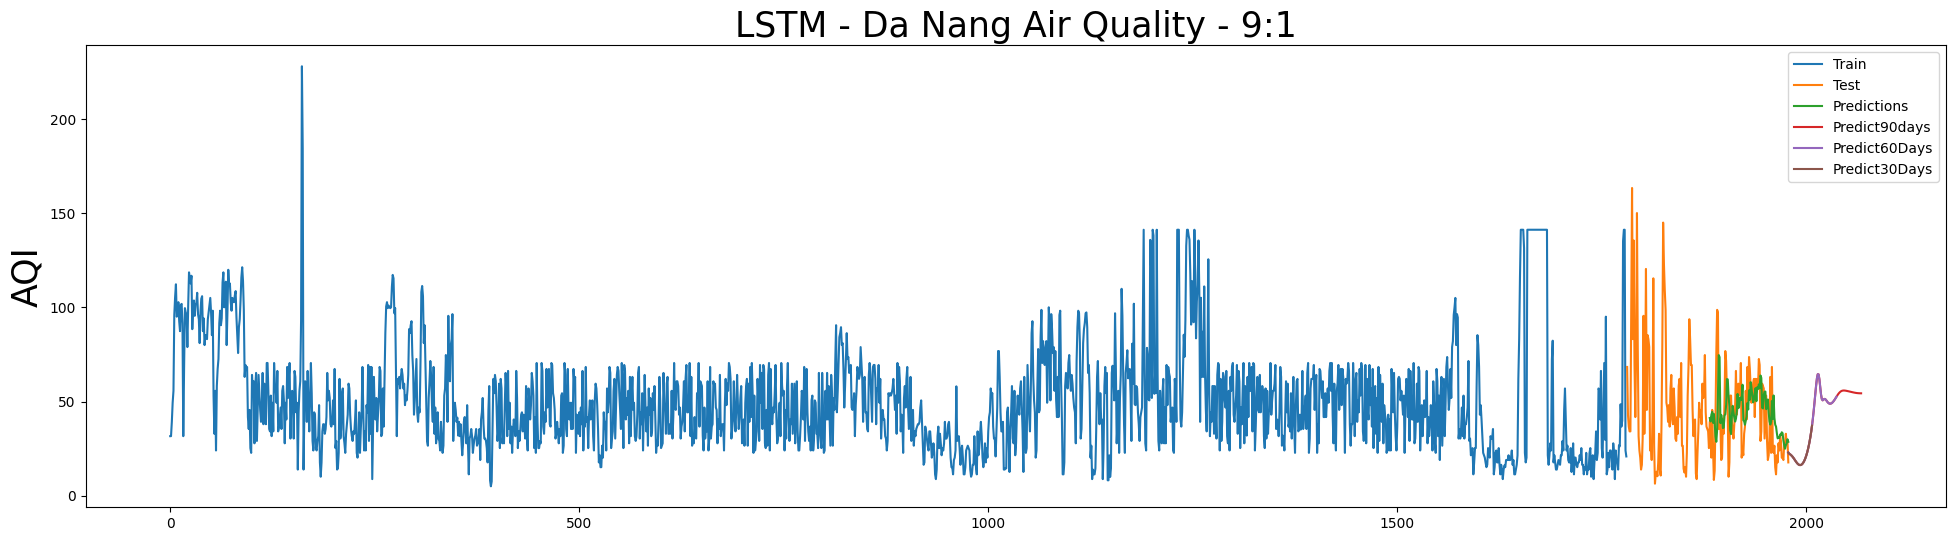

In [65]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1+101, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,(y_pred_9_1))

prediect_data_index_90d = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+89, step=1)
plt.plot(prediect_data_index_90d,scaler.inverse_transform(lst_output_9_1_90d))

prediect_data_index_60d = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+59, step=1)
plt.plot(prediect_data_index_60d,scaler.inverse_transform(lst_output_9_1_60d))

prediect_data_index_30d = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+29, step=1)
plt.plot(prediect_data_index_30d,scaler.inverse_transform(lst_output_9_1_30d))

plt.title('LSTM - Da Nang Air Quality - 9:1', fontsize = 25)
plt.ylabel('AQI', fontsize = 25)
plt.legend(['Train','Test','Predictions', 'Predict90days', 'Predict60Days', 'Predict30Days'])
plt.show()

# Viet tri

In [66]:
# Da Nang
# train:test 7:3
train_size_7_3 = int(0.7 * len(df_vt))
test_size_7_3 = len(df_vt) - train_size_7_3

train_data_7_3 = df_vt[:train_size_7_3]
test_data_7_3 = df_vt[train_size_7_3:]

# train:test 8:2
train_size_8_2 = int(0.8 * len(df_vt))
test_size_8_2 = len(df_vt) - train_size_8_2

train_data_8_2 = df_vt[:train_size_8_2]
test_data_8_2 = df_vt[train_size_8_2:]

# train:test 9:1
train_size_9_1 = int(0.9 * len(df_vt))
test_size_9_1 = len(df_vt) - train_size_9_1

train_data_9_1 = df_vt[:train_size_9_1]
test_data_9_1 = df_vt[train_size_9_1:]

In [67]:
time_step = 100

X_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
X_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

X_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
X_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

X_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
X_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [68]:
X_train_7_3 = X_train_7_3.reshape(X_train_7_3.shape[0],X_train_7_3.shape[1] , 1)
X_test_7_3 = X_test_7_3.reshape(X_test_7_3.shape[0],X_test_7_3.shape[1] , 1)

X_train_8_2 = X_train_8_2.reshape(X_train_8_2.shape[0],X_train_8_2.shape[1] , 1)
X_test_8_2 = X_test_8_2.reshape(X_test_8_2.shape[0],X_test_8_2.shape[1] , 1)

X_train_9_1 = X_train_9_1.reshape(X_train_9_1.shape[0],X_train_9_1.shape[1] , 1)
X_test_9_1 = X_test_9_1.reshape(X_test_9_1.shape[0],X_test_9_1.shape[1] , 1)

## Viet Tri - train:test 7:3

In [69]:
model_7_3 =Sequential()
model_7_3.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_7_3.add(LSTM(50,return_sequences=True))
model_7_3.add(LSTM(50))
model_7_3.add(Dense(1))
model_7_3.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
model_7_3.fit(X_train_7_3, y_train_7_3, validation_data=(X_test_7_3, y_test_7_3), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0664 - val_loss: 0.0300
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0240 - val_loss: 0.0279
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0248 - val_loss: 0.0259
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0239 - val_loss: 0.0245
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0227 - val_loss: 0.0243
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0220 - val_loss: 0.0246
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0230 - val_loss: 0.0239
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0216 - val_loss: 0.0235
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0221 - val_loss: 0.0234
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0212 - val_loss: 0.0238
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0212 - val_loss: 0.0234
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step

In [71]:
y_pred_7_3 = model_7_3.predict(X_test_7_3)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [72]:
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_test_7_3_scale = scaler.inverse_transform(y_test_7_3.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_7_3_scale, y_pred_7_3))
mae = mean_absolute_error(y_test_7_3_scale, y_pred_7_3)
mape = np.mean(np.abs((y_test_7_3_scale - y_pred_7_3) / y_test_7_3_scale)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 27.97
MAE: 22.33
MAPE: 34.86%


In [74]:
# Dự báo 30 ngày tiếp theo

x_input_7_3_30d=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3_30d.shape

temp_input_7_3_30d=list(x_input_7_3_30d)
temp_input_7_3_30d=temp_input_7_3_30d[0].tolist()

lst_output_7_3_30d=[]
n_steps=100
i=0

while(i < 30):

    if(len(temp_input_7_3_30d) > 100):
        x_input_7_3_30d = np.array(temp_input_7_3_30d[1:])
        x_input_7_3_30d = x_input_7_3_30d.reshape(1,-1)
        x_input_7_3_30d = x_input_7_3_30d.reshape((1, n_steps, 1))
        yhat = model_7_3.predict(x_input_7_3_30d, verbose=0)
        temp_input_7_3_30d.extend(yhat[0].tolist())
        temp_input_7_3_30d = temp_input_7_3_30d[1:]
        lst_output_7_3_30d.extend(yhat.tolist())

    else:
        x_input_7_3_30d = x_input_7_3_30d.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3_30d, verbose=0)
        temp_input_7_3_30d.extend(yhat[0].tolist())
        lst_output_7_3_30d.extend(yhat.tolist())

    i=i+1

In [75]:
# Dự báo 60 ngày tiếp theo

x_input_7_3_60d=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3_60d.shape

temp_input_7_3_60d=list(x_input_7_3_60d)
temp_input_7_3_60d=temp_input_7_3_60d[0].tolist()

lst_output_7_3_60d=[]
n_steps=100
i=0

while(i < 60):

    if(len(temp_input_7_3_60d) > 100):
        x_input_7_3_60d = np.array(temp_input_7_3_60d[1:])
        x_input_7_3_60d = x_input_7_3_60d.reshape(1,-1)
        x_input_7_3_60d = x_input_7_3_60d.reshape((1, n_steps, 1))
        yhat = model_7_3.predict(x_input_7_3_60d, verbose=0)
        temp_input_7_3_60d.extend(yhat[0].tolist())
        temp_input_7_3_60d = temp_input_7_3_60d[1:]
        lst_output_7_3_60d.extend(yhat.tolist())

    else:
        x_input_7_3_60d = x_input_7_3_60d.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3_60d, verbose=0)
        temp_input_7_3_60d.extend(yhat[0].tolist())
        lst_output_7_3_60d.extend(yhat.tolist())

    i=i+1

In [76]:
# Dự báo 90 ngày tiếp theo

x_input_7_3_90d=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3_90d.shape

temp_input_7_3_90d=list(x_input_7_3_90d)
temp_input_7_3_90d=temp_input_7_3_90d[0].tolist()

lst_output_7_3_90d=[]
n_steps=100
i=0

while(i < 90):

    if(len(temp_input_7_3_90d) > 100):
        x_input_7_3_90d = np.array(temp_input_7_3_90d[1:])
        x_input_7_3_90d = x_input_7_3_90d.reshape(1,-1)
        x_input_7_3_90d = x_input_7_3_90d.reshape((1, n_steps, 1))
        yhat = model_7_3.predict(x_input_7_3_90d, verbose=0)
        temp_input_7_3_90d.extend(yhat[0].tolist())
        temp_input_7_3_90d = temp_input_7_3_90d[1:]
        lst_output_7_3_90d.extend(yhat.tolist())

    else:
        x_input_7_3_90d = x_input_7_3_90d.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3_90d, verbose=0)
        temp_input_7_3_90d.extend(yhat[0].tolist())
        lst_output_7_3_90d.extend(yhat.tolist())

    i=i+1

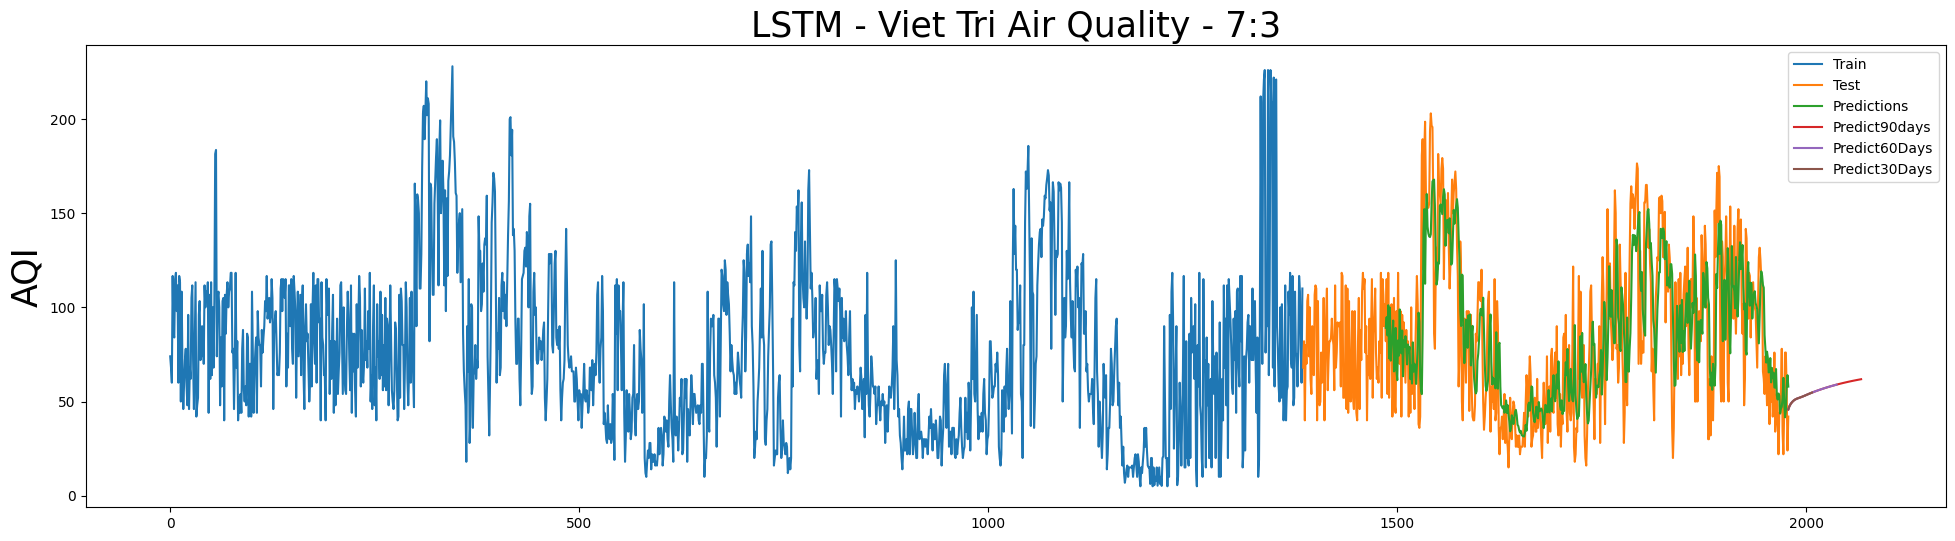

In [77]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3+101, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,(y_pred_7_3))

prediect_data_index_90d = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+89, step=1)
plt.plot(prediect_data_index_90d,scaler.inverse_transform(lst_output_7_3_90d))

prediect_data_index_60d = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+59, step=1)
plt.plot(prediect_data_index_60d,scaler.inverse_transform(lst_output_7_3_60d))

prediect_data_index_30d = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+29, step=1)
plt.plot(prediect_data_index_30d,scaler.inverse_transform(lst_output_7_3_30d))

plt.title('LSTM - Viet Tri Air Quality - 7:3', fontsize = 25)
plt.ylabel('AQI', fontsize = 25)
plt.legend(['Train','Test','Predictions', 'Predict90days', 'Predict60Days', 'Predict30Days'])
plt.show()

## Viet Tri - train:test 8:2

In [78]:
model_8_2 =Sequential()
model_8_2.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_8_2.add(LSTM(50,return_sequences=True))
model_8_2.add(LSTM(50))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
model_8_2.fit(X_train_8_2, y_train_8_2, validation_data=(X_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0596 - val_loss: 0.0260
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0250 - val_loss: 0.0260
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0229 - val_loss: 0.0265
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0225 - val_loss: 0.0256
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0227 - val_loss: 0.0270
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0220 - val_loss: 0.0251
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0230 - val_loss: 0.0249
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0206 - val_loss: 0.0244
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0203 - val_loss: 0.0238
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0200 - val_loss: 0.0231
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0199 - val_loss: 0.0228
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step

In [80]:
y_pred_8_2 = model_8_2.predict(X_test_8_2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [81]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))

In [82]:
y_test_8_2_scale = scaler.inverse_transform(y_test_8_2.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_8_2_scale, y_pred_8_2))
mae = mean_absolute_error(y_test_8_2_scale, y_pred_8_2)
mape = np.mean(np.abs((y_test_8_2_scale - y_pred_8_2) / y_test_8_2_scale)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 29.02
MAE: 23.62
MAPE: 36.91%


In [83]:
# Dự báo 30 ngày tiếp theo

x_input_8_2_30d=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2_30d.shape

temp_input_8_2_30d=list(x_input_8_2_30d)
temp_input_8_2_30d=temp_input_8_2_30d[0].tolist()

lst_output_8_2_30d=[]
n_steps=100
i=0

while(i < 30):

    if(len(temp_input_8_2_30d) > 100):
        x_input_8_2_30d = np.array(temp_input_8_2_30d[1:])
        x_input_8_2_30d = x_input_8_2_30d.reshape(1,-1)
        x_input_8_2_30d = x_input_8_2_30d.reshape((1, n_steps, 1))
        yhat = model_8_2.predict(x_input_8_2_30d, verbose=0)
        temp_input_8_2_30d.extend(yhat[0].tolist())
        temp_input_8_2_30d = temp_input_8_2_30d[1:]
        lst_output_8_2_30d.extend(yhat.tolist())

    else:
        x_input_8_2_30d = x_input_8_2_30d.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2_30d, verbose=0)
        temp_input_8_2_30d.extend(yhat[0].tolist())
        lst_output_8_2_30d.extend(yhat.tolist())

    i=i+1

In [84]:
# Dự báo 60 ngày tiếp theo

x_input_8_2_60d=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2_60d.shape

temp_input_8_2_60d=list(x_input_8_2_60d)
temp_input_8_2_60d=temp_input_8_2_60d[0].tolist()

lst_output_8_2_60d=[]
n_steps=100
i=0

while(i < 60):

    if(len(temp_input_8_2_60d) > 100):
        x_input_8_2_60d = np.array(temp_input_8_2_60d[1:])
        x_input_8_2_60d = x_input_8_2_60d.reshape(1,-1)
        x_input_8_2_60d = x_input_8_2_60d.reshape((1, n_steps, 1))
        yhat = model_8_2.predict(x_input_8_2_60d, verbose=0)
        temp_input_8_2_60d.extend(yhat[0].tolist())
        temp_input_8_2_60d = temp_input_8_2_60d[1:]
        lst_output_8_2_60d.extend(yhat.tolist())

    else:
        x_input_8_2_60d = x_input_8_2_60d.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2_60d, verbose=0)
        temp_input_8_2_60d.extend(yhat[0].tolist())
        lst_output_8_2_60d.extend(yhat.tolist())

    i=i+1

In [85]:
# Dự báo 90 ngày tiếp theo

x_input_8_2_90d=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2_90d.shape

temp_input_8_2_90d=list(x_input_8_2_90d)
temp_input_8_2_90d=temp_input_8_2_90d[0].tolist()

lst_output_8_2_90d=[]
n_steps=100
i=0

while(i < 90):

    if(len(temp_input_8_2_90d) > 100):
        x_input_8_2_90d = np.array(temp_input_8_2_90d[1:])
        x_input_8_2_90d = x_input_8_2_90d.reshape(1,-1)
        x_input_8_2_90d = x_input_8_2_90d.reshape((1, n_steps, 1))
        yhat = model_8_2.predict(x_input_8_2_90d, verbose=0)
        temp_input_8_2_90d.extend(yhat[0].tolist())
        temp_input_8_2_90d = temp_input_8_2_90d[1:]
        lst_output_8_2_90d.extend(yhat.tolist())

    else:
        x_input_8_2_90d = x_input_8_2_90d.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2_90d, verbose=0)
        temp_input_8_2_90d.extend(yhat[0].tolist())
        lst_output_8_2_90d.extend(yhat.tolist())

    i=i+1

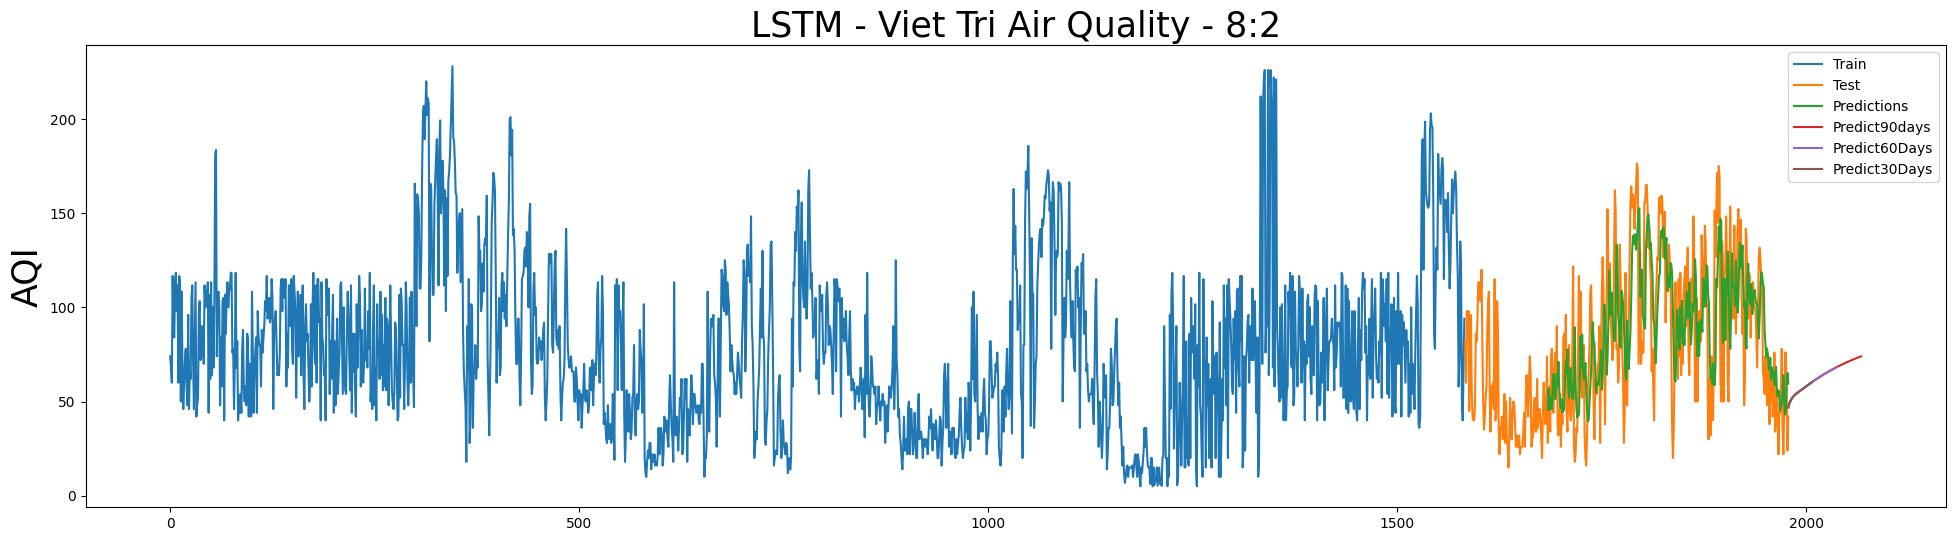

In [86]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2+101, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,(y_pred_8_2))

prediect_data_index_90d = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+89, step=1)
plt.plot(prediect_data_index_90d,scaler.inverse_transform(lst_output_8_2_90d))

prediect_data_index_60d = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+59, step=1)
plt.plot(prediect_data_index_60d,scaler.inverse_transform(lst_output_8_2_60d))

prediect_data_index_30d = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+29, step=1)
plt.plot(prediect_data_index_30d,scaler.inverse_transform(lst_output_8_2_30d))

plt.title('LSTM - Viet Tri Air Quality - 8:2', fontsize = 25)
plt.ylabel('AQI', fontsize = 25)
plt.legend(['Train','Test','Predictions', 'Predict90days', 'Predict60Days', 'Predict30Days'])
plt.show()

## Viet Tri - train:test 9:1

In [87]:
model_9_1 =Sequential()
model_9_1.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_9_1.add(LSTM(50,return_sequences=True))
model_9_1.add(LSTM(50))
model_9_1.add(Dense(1))
model_9_1.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [88]:
model_9_1.fit(X_train_9_1, y_train_9_1, validation_data=(X_test_9_1, y_test_9_1), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0535 - val_loss: 0.0259
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0232 - val_loss: 0.0270
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0234 - val_loss: 0.0259
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0223 - val_loss: 0.0258
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0233 - val_loss: 0.0252
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0213 - val_loss: 0.0255
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0220 - val_loss: 0.0252
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0204 - val_loss: 0.0263
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0201 - val_loss: 0.0275
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0216 - val_loss: 0.0235
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0205 - val_loss: 0.0231
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step

In [89]:
y_pred_9_1 = model_9_1.predict(X_test_9_1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


In [90]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))

In [91]:
y_test_9_1_scale = scaler.inverse_transform(y_test_9_1.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_9_1_scale, y_pred_9_1))
mae = mean_absolute_error(y_test_9_1_scale, y_pred_9_1)
mape = np.mean(np.abs((y_test_9_1_scale - y_pred_9_1) / y_test_9_1_scale)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 28.97
MAE: 22.76
MAPE: 32.70%


In [92]:
# Dự báo 30 ngày tiếp theo

x_input_9_1_30d=test_data_9_1[-100:].reshape(1,-1)
x_input_9_1_30d.shape

temp_input_9_1_30d=list(x_input_9_1_30d)
temp_input_9_1_30d=temp_input_9_1_30d[0].tolist()

lst_output_9_1_30d=[]
n_steps=100
i=0

while(i < 30):

    if(len(temp_input_9_1_30d) > 100):
        x_input_9_1_30d = np.array(temp_input_9_1_30d[1:])
        x_input_9_1_30d = x_input_9_1_30d.reshape(1,-1)
        x_input_9_1_30d = x_input_9_1_30d.reshape((1, n_steps, 1))
        yhat = model_9_1.predict(x_input_9_1_30d, verbose=0)
        temp_input_9_1_30d.extend(yhat[0].tolist())
        temp_input_9_1_30d = temp_input_9_1_30d[1:]
        lst_output_9_1_30d.extend(yhat.tolist())

    else:
        x_input_9_1_30d = x_input_9_1_30d.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1_30d, verbose=0)
        temp_input_9_1_30d.extend(yhat[0].tolist())
        lst_output_9_1_30d.extend(yhat.tolist())

    i=i+1

In [93]:
# Dự báo 60 ngày tiếp theo

x_input_9_1_60d=test_data_8_2[-100:].reshape(1,-1)
x_input_9_1_60d.shape

temp_input_9_1_60d=list(x_input_9_1_60d)
temp_input_9_1_60d=temp_input_9_1_60d[0].tolist()

lst_output_9_1_60d=[]
n_steps=100
i=0

while(i < 60):

    if(len(temp_input_9_1_60d) > 100):
        x_input_9_1_60d = np.array(temp_input_9_1_60d[1:])
        x_input_9_1_60d = x_input_9_1_60d.reshape(1,-1)
        x_input_9_1_60d = x_input_9_1_60d.reshape((1, n_steps, 1))
        yhat = model_9_1.predict(x_input_9_1_60d, verbose=0)
        temp_input_9_1_60d.extend(yhat[0].tolist())
        temp_input_9_1_60d = temp_input_9_1_60d[1:]
        lst_output_9_1_60d.extend(yhat.tolist())

    else:
        x_input_9_1_60d = x_input_9_1_60d.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1_60d, verbose=0)
        temp_input_9_1_60d.extend(yhat[0].tolist())
        lst_output_9_1_60d.extend(yhat.tolist())

    i=i+1

In [94]:
# Dự báo 90 ngày tiếp theo

x_input_9_1_90d=test_data_8_2[-100:].reshape(1,-1)
x_input_9_1_90d.shape

temp_input_9_1_90d=list(x_input_9_1_90d)
temp_input_9_1_90d=temp_input_9_1_90d[0].tolist()

lst_output_9_1_90d=[]
n_steps=100
i=0

while(i < 90):

    if(len(temp_input_9_1_90d) > 100):
        x_input_9_1_90d = np.array(temp_input_9_1_90d[1:])
        x_input_9_1_90d = x_input_9_1_90d.reshape(1,-1)
        x_input_9_1_90d = x_input_9_1_90d.reshape((1, n_steps, 1))
        yhat = model_9_1.predict(x_input_9_1_90d, verbose=0)
        temp_input_9_1_90d.extend(yhat[0].tolist())
        temp_input_9_1_90d = temp_input_9_1_90d[1:]
        lst_output_9_1_90d.extend(yhat.tolist())

    else:
        x_input_9_1_90d = x_input_9_1_90d.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1_90d, verbose=0)
        temp_input_9_1_90d.extend(yhat[0].tolist())
        lst_output_9_1_90d.extend(yhat.tolist())

    i=i+1

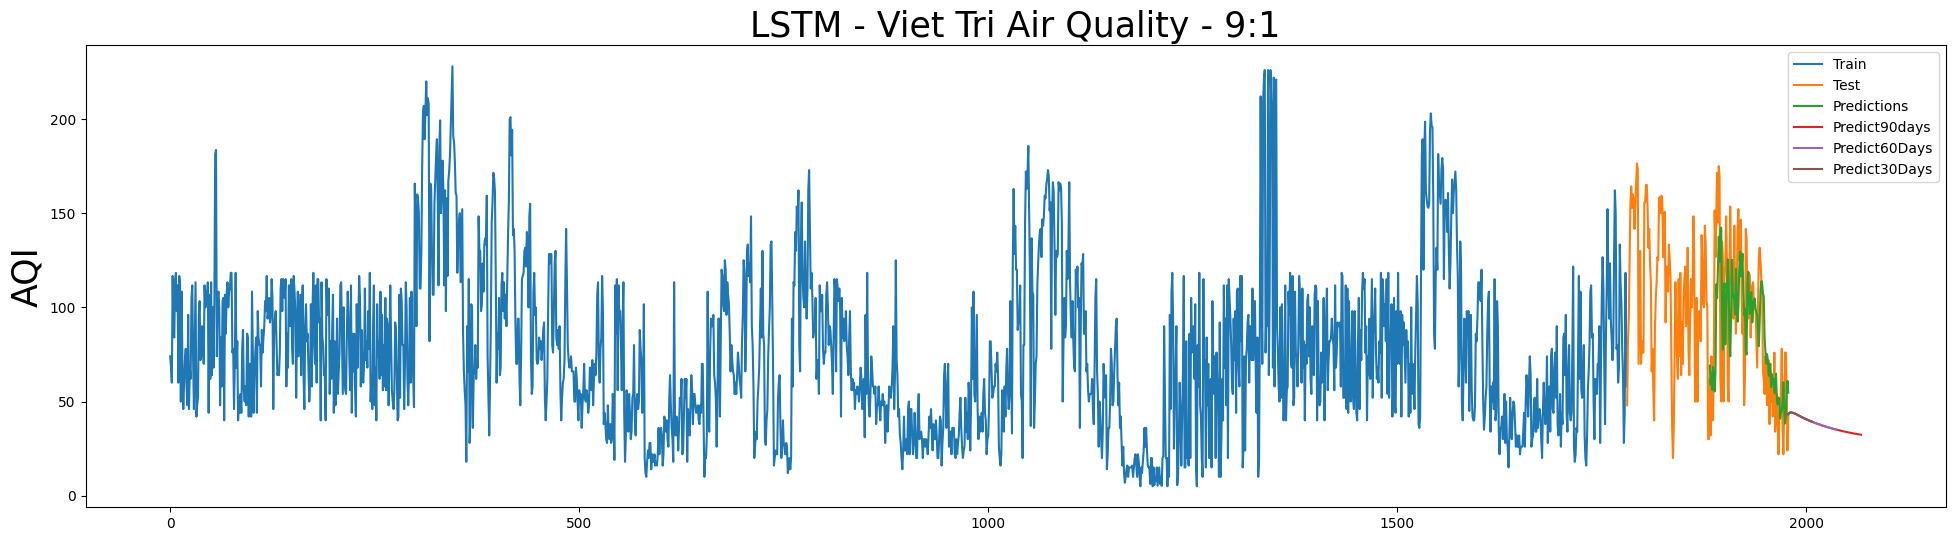

In [95]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1+101, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,(y_pred_9_1))

prediect_data_index_90d = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+89, step=1)
plt.plot(prediect_data_index_90d,scaler.inverse_transform(lst_output_9_1_90d))

prediect_data_index_60d = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+59, step=1)
plt.plot(prediect_data_index_60d,scaler.inverse_transform(lst_output_9_1_60d))

prediect_data_index_30d = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+29, step=1)
plt.plot(prediect_data_index_30d,scaler.inverse_transform(lst_output_9_1_30d))

plt.title('LSTM - Viet Tri Air Quality - 9:1', fontsize = 25)
plt.ylabel('AQI', fontsize = 25)
plt.legend(['Train','Test','Predictions', 'Predict90days', 'Predict60Days', 'Predict30Days'])
plt.show()